# Jupyter notebook for data Analysis 

In [1]:
#import modules 
%pylab inline 
#matplotlib notebook 
import os 
import nglview as nv
import mdtraj as mdt
Sim_Direc = !(ls -d */)
bas_dir = !pwd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


In [11]:
%qtconsole

In [3]:
# folder reference creation 
DPPG_fol=[]
DMPG_fol=[]
for i in Sim_Direc:
    if("DMPG" not in i and ("DPPG" in i or "PG" in i)):
        DPPG_fol.append(i)
    if("DMPG" in i or "MG" in i):
        DMPG_fol.append(i)
#put membrane simulation first
myorder = [1,2,3,0]
DMPG_fol = [DMPG_fol[i] for i in myorder]
DPPG_fol = [DPPG_fol[i] for i in myorder]

# Time traces of APL by LIPID System

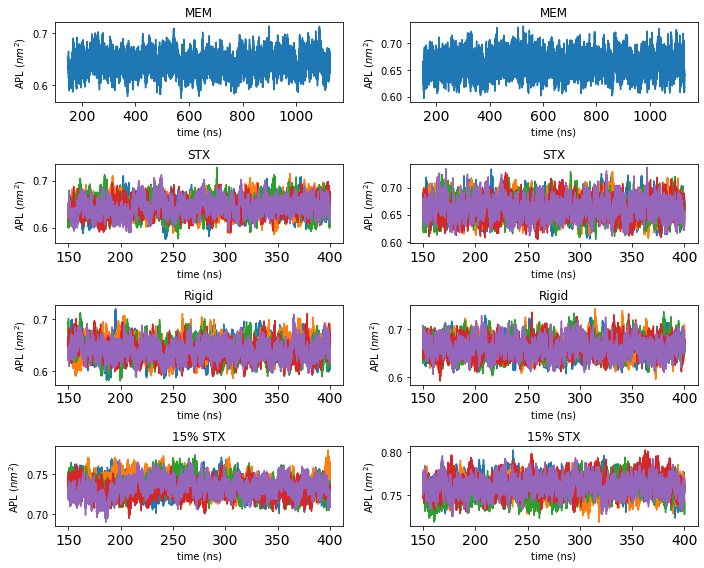

In [3]:
# plot APL vs time of every system in the same subplot 
fig,ax  = plt.subplots(4,2,sharex=False,figsize=(10,8))
for j,direc in enumerate(DPPG_fol):
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            name=direc[0:3]
            if("15" in direc ):
                name="15% STX"
            if("QM" in direc):
                name="Rigid"
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)) 
            ax[j][0].plot(APL[:,0]/1000,APL[:,1],label=("{}-{}".format(name,replica)))
            ax[j][0].set_title("{}".format(name))
            plt.setp(ax[j][0].get_xticklabels(), fontsize=14)
            plt.xlabel("t (ns)")
            plt.ylabel("APL (nm)")
        except:
            #print("no data  {}".format(direc))
            print("",end="")
        if("MEM" in direc):
            break
for j,direc in enumerate(DMPG_fol):
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        if("15" in direc):
            N=362
        else:
            N=128 
        try:
            name=direc[0:3]
            if("15" in direc ):
                name="15% STX"
            if("QM" in direc):
                name="Rigid"
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
            #print("APL of {}-{}  is = {}".format(direc,replica,np.mean(APL)))   
            ax[j][1].plot(APL[:,0]/1000,APL[:,1],label=("{}-{}".format(name,replica)))
            ax[j][1].set_title("{}".format(name))
            plt.setp(ax[j][1].get_xticklabels(), fontsize=14)
            plt.xlabel("t (ns)")
            plt.ylabel("APL (nm)")
        except:
            #print("no data  {}".format(direc))
            print("",end="")
        if("MEM" in direc):
            break
for axs in ax.flat:
    axs.set(xlabel='time (ns)', ylabel='APL $(nm^2)$ ')

fig.tight_layout()

# Histogram of APL of all simulations 

 15STX-DMPG/ 
APL mean 0.7591626496748026
APL std 0.009797751211423613
Std error 0.004898875605711807 
 
 15STX-DPPG/ 
APL mean 0.734015672375421
APL std 0.010190236841167367
Std error 0.005095118420583683 
 
 MEM-MG/ 
APL mean 0.6596200061363215
APL std 0.01678084628241779
Std error 0.008390423141208895 
 
 MEM-PG/ 
APL mean 0.6410776665094988
APL std 0.01686808223653545
Std error 0.008434041118267725 
 
 STX-DMPG/ 
APL mean 0.6620177631266949
APL std 0.0164320762804844
Std error 0.0082160381402422 
 
 STX-DPPG/ 
APL mean 0.6429370571371431
APL std 0.016855574330401416
Std error 0.008427787165200708 
 
 STXQM-DMPG/ 
APL mean 0.6622159350757195
APL std 0.01682940755723228
Std error 0.00841470377861614 
 
 STXQM-DPPG/ 
APL mean 0.6405622630282959
APL std 0.016576342893483885
Std error 0.008288171446741942 
 


Text(0.5, 1.0, 'Histogram of all systems ')

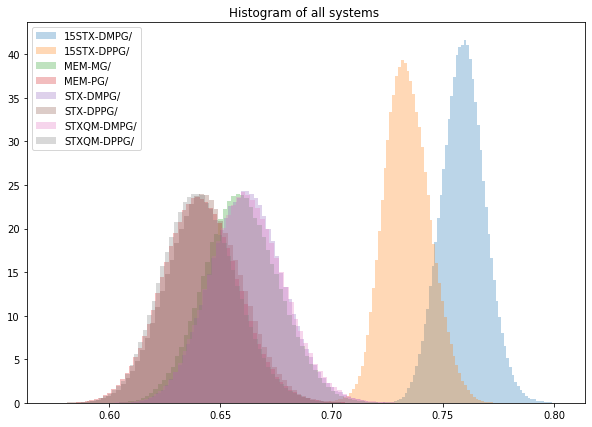

In [4]:
plt.figure(figsize=(10,7))
for direc in Sim_Direc:
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        try:
            name=direc[0:3]
            if("15" in direc ):
                name="15% STX"
            if("QM" in direc):
                name="Rigid"
            if("15" in direc):
                N=362
            else:
                N=128        
            APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)) 
            apl.extend(APL[:,1])
            if(replica==5):
                print(" {} ".format(direc))
                print("APL mean {}".format(np.mean(apl)))
                print("APL std {}".format(np.std(apl)))
                print("Std error {} \n ".format(np.std(apl)/sqrt(4)))
                plt.hist(apl,bins=70,alpha=0.3,label="{}".format(direc),density=True)
        except:
            print("No data {}".format(direc))
        if("MEM" in direc):
            print(" {} ".format(direc))
            print("APL mean {}".format(np.mean(apl)))
            print("APL std {}".format(np.std(apl)))
            print("Std error {} \n ".format(np.std(apl)/sqrt(4)))
            plt.hist(apl,bins=70,alpha=0.3,label="{}".format(direc),density=True)
            break
plt.legend()   
plt.title("Histogram of all systems ")

# PLOT of every system APL

reading from MEM-PG/1   reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   reading from MEM-MG/1   reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   

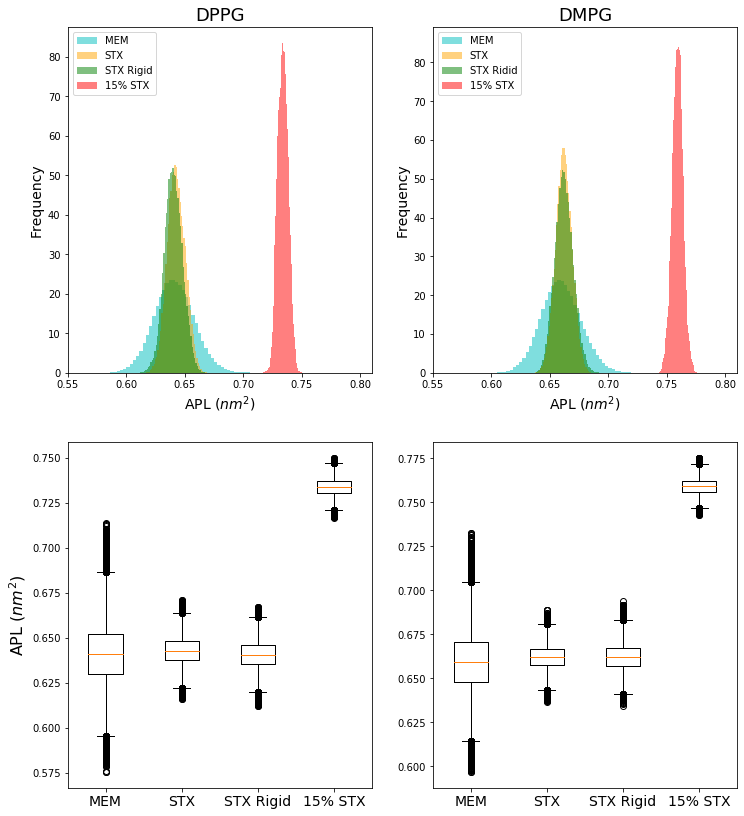

In [108]:
fig,ax  = plt.subplots(2,2,sharex=False,figsize=(12,14))
names = ["MEM","STX","STX Rigid","15% STX"]
bygroup_apl_dppg = []
for j,direc in enumerate(DPPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        apl.append(APL[:,1])
        if("MEM" in direc):
            bygroup_apl_dppg.append((apl[0]))
            break
        if(replica==5):
            sum_temp=(apl[0]+apl[1]+apl[2]+apl[3]+apl[4])
            mean=sum_temp/5
            temp_ar = np.stack(apl,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_apl_dppg.append((mean,std))
            
ax[0][0].hist(bygroup_apl_dppg[0],label="MEM",bins=50,alpha=0.5,density=True,color="c")
ax[0][0].hist(bygroup_apl_dppg[1][0],label="STX",bins=50,alpha=0.5,density=True,color="orange")
ax[0][0].hist(bygroup_apl_dppg[2][0],label="STX Rigid",bins=50,alpha=0.5,density=True,color="g")
ax[0][0].hist(bygroup_apl_dppg[3][0],label="15% STX",bins=50,alpha=0.5,density=True,color="r")
ax[0][0].set_title("DPPG",fontsize=18)
ax[0][0].set_xlim(0.55,0.81)
ax[0][0].set_xlabel("APL $(nm^2)$",fontsize=14)
ax[0][0].set_ylabel("Frequency",fontsize=14)
ax[0][0].legend()
data = [bygroup_apl_dppg[0],bygroup_apl_dppg[1][0],bygroup_apl_dppg[2][0],bygroup_apl_dppg[3][0]]
ax[1][0].boxplot(data) 
ax[1][0].set_ylabel("APL",fontsize=12)
ax[1][0].set_xticklabels(names,fontsize=14)


bygroup_apl_dmpg = []
mean_Data=[]
for j,direc in enumerate(DMPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        apl.append(APL[:,1])
        mean_Data.append(np.mean(apl[-1]))
        if("MEM" in direc):
            bygroup_apl_dmpg.append((apl[0]))
            break
        if(replica==5):
            sum_temp=(apl[0]+apl[1]+apl[2]+apl[3]+apl[4])
            mean=sum_temp/5
            temp_ar = np.stack(apl,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_apl_dmpg.append((mean,std))


ax[0][1].hist(bygroup_apl_dmpg[0],label="MEM",bins=50,alpha=0.5,density=True,color="c")
ax[0][1].hist(bygroup_apl_dmpg[1][0],label="STX",bins=50,alpha=0.5,density=True,color="orange")
ax[0][1].hist(bygroup_apl_dmpg[2][0],label="STX Ridid",bins=50,alpha=0.5,density=True,color="g")
ax[0][1].hist(bygroup_apl_dmpg[3][0],label="15% STX",bins=50,alpha=0.5,density=True,color="r")
ax[0][1].set_title("DMPG",fontsize=18)
ax[0][1].set_xlim(0.55,0.81)
ax[0][1].set_xlabel("APL $(nm^2)$",fontsize=14)
ax[0][1].set_ylabel("Frequency",fontsize=14)
ax[0][1].legend()
#dict_dmg = {'STX_DMPG':bygroup_apl_dmpg[1],'STXQM_DMPG':bygroup_apl_dmpg[2] ,'15STX_DMPG':bygroup_apl_dmpg[3]}
#df=pd.DataFrame(dict_dmg)
data = [bygroup_apl_dmpg[0],bygroup_apl_dmpg[1][0],bygroup_apl_dmpg[2][0],bygroup_apl_dmpg[3][0]]
ax[1][1].boxplot(data) 
ax[1][1].set_xticklabels(names,fontsize=14)
ax[1][0].set_ylabel("APL $(nm^2)$",fontsize=16)
fig.savefig("APL_boxplot_all.jpg")

reading from MEM-PG/1   reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   reading from MEM-MG/1   reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   

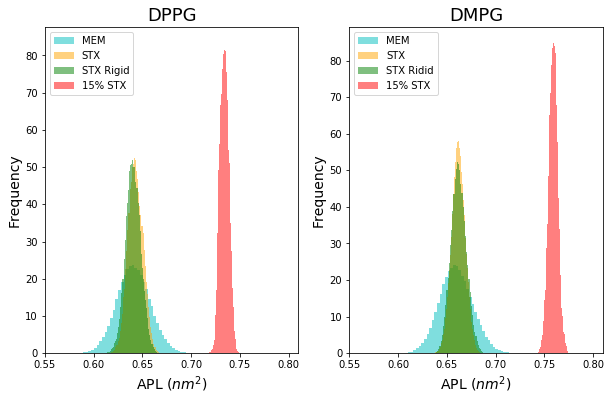

In [113]:
fig,ax  = plt.subplots(1,2,sharex=False,figsize=(10,6))
names = ["MEM","STX","STX Rigid","15% STX"]
bygroup_apl_dppg = []
for j,direc in enumerate(DPPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        apl.append(APL[:,1])
        if("MEM" in direc):
            bygroup_apl_dppg.append((apl[0]))
            break
        if(replica==5):
            sum_temp=(apl[0]+apl[1]+apl[2]+apl[3]+apl[4])
            mean=sum_temp/5
            temp_ar = np.stack(apl,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_apl_dppg.append((mean,std))
            
ax[0].hist(bygroup_apl_dppg[0],label="MEM",bins=50,alpha=0.5,density=True,color="c")
ax[0].hist(bygroup_apl_dppg[1][0],label="STX",bins=50,alpha=0.5,density=True,color="orange")
ax[0].hist(bygroup_apl_dppg[2][0],label="STX Rigid",bins=50,alpha=0.5,density=True,color="g")
ax[0].hist(bygroup_apl_dppg[3][0],label="15% STX",bins=50,alpha=0.5,density=True,color="r")
ax[0].set_title("DPPG",fontsize=18)
ax[0].set_xlim(0.55,0.81)
ax[0].set_xlabel("APL $(nm^2)$",fontsize=14)
ax[0].set_ylabel("Frequency",fontsize=14)
ax[0].legend()


bygroup_apl_dmpg = []
mean_Data=[]
for j,direc in enumerate(DMPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        apl.append(APL[:,1])
        mean_Data.append(np.mean(apl[-1]))
        if("MEM" in direc):
            bygroup_apl_dmpg.append((apl[0]))
            break
        if(replica==5):
            sum_temp=(apl[0]+apl[1]+apl[2]+apl[3]+apl[4])
            mean=sum_temp/5
            temp_ar = np.stack(apl,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_apl_dmpg.append((mean,std))


ax[1].hist(bygroup_apl_dmpg[0],label="MEM",bins=50,alpha=0.5,density=True,color="c")
ax[1].hist(bygroup_apl_dmpg[1][0],label="STX",bins=50,alpha=0.5,density=True,color="orange")
ax[1].hist(bygroup_apl_dmpg[2][0],label="STX Ridid",bins=50,alpha=0.5,density=True,color="g")
ax[1].hist(bygroup_apl_dmpg[3][0],label="15% STX",bins=50,alpha=0.5,density=True,color="r")
ax[1].set_title("DMPG",fontsize=18)
ax[1].set_xlim(0.55,0.81)
ax[1].set_xlabel("APL $(nm^2)$",fontsize=14)
ax[1].set_ylabel("Frequency",fontsize=14)
ax[1].legend()
#dict_dmg = {'STX_DMPG':bygroup_apl_dmpg[1],'STXQM_DMPG':bygroup_apl_dmpg[2] ,'15STX_DMPG':bygroup_apl_dmpg[3]}
#df=pd.DataFrame(dict_dmg)


fig.savefig("APL_no_boxplot.jpg")

reading from MEM-PG/1   reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   reading from MEM-MG/1   reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   

'\nax[1].hist(bygroup_apl_dmpg[0],label="MEM",bins=50,alpha=0.5,density=True,color="c")\nax[1].hist(bygroup_apl_dmpg[1][0],label="STX",bins=50,alpha=0.5,density=True,color="orange")\nax[1].hist(bygroup_apl_dmpg[2][0],label="STX Ridid",bins=50,alpha=0.5,density=True,color="g")\nax[1].hist(bygroup_apl_dmpg[3][0],label="15% STX",bins=50,alpha=0.5,density=True,color="r")\nax[1].set_title("DMPG",fontsize=18)\nax[1].set_xlim(0.55,0.81)\nax[1].set_xlabel("APL $(nm^2)$",fontsize=14)\nax[1].set_ylabel("Frequency",fontsize=14)\nax[1].legend()\n#dict_dmg = {\'STX_DMPG\':bygroup_apl_dmpg[1],\'STXQM_DMPG\':bygroup_apl_dmpg[2] ,\'15STX_DMPG\':bygroup_apl_dmpg[3]}\n#df=pd.DataFrame(dict_dmg)\n\n\nfig.savefig("APL_no_boxplot.jpg")\n'

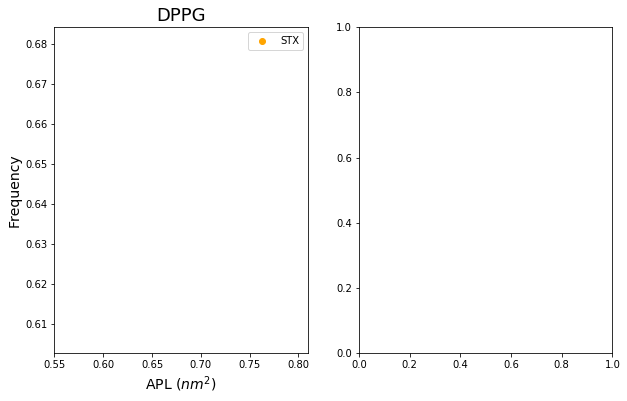

In [117]:
fig,ax  = plt.subplots(1,2,sharex=False,figsize=(10,6))
names = ["MEM","STX","STX Rigid","15% STX"]
bygroup_apl_dppg = []
for j,direc in enumerate(DPPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        apl.append(APL[:,1])
        if("MEM" in direc):
            bygroup_apl_dppg.append((apl[0]))
            break
        if(replica==5):
            sum_temp=(apl[0]+apl[1]+apl[2]+apl[3]+apl[4])
            mean=sum_temp/5
            temp_ar = np.stack(apl,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_apl_dppg.append((mean,std))
            
#ax[0].plot(bygroup_apl_dppg[0],label="MEM",bins=50,alpha=0.5,density=True,color="c")
ax[0].scatter(APL[:,0],bygroup_apl_dppg[1][0],label="STX",color="orange")
ax[0].set_title("DPPG",fontsize=18)
ax[0].set_xlim(0.55,0.81)
ax[0].set_xlabel("APL $(nm^2)$",fontsize=14)
ax[0].set_ylabel("Frequency",fontsize=14)
ax[0].legend()


bygroup_apl_dmpg = []
mean_Data=[]
for j,direc in enumerate(DMPG_fol):
    apl=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        APL = np.genfromtxt("{}/{}/{}_{}APL.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        apl.append(APL[:,1])
        mean_Data.append(np.mean(apl[-1]))
        if("MEM" in direc):
            bygroup_apl_dmpg.append((apl[0]))
            break
        if(replica==5):
            sum_temp=(apl[0]+apl[1]+apl[2]+apl[3]+apl[4])
            mean=sum_temp/5
            temp_ar = np.stack(apl,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_apl_dmpg.append((mean,std))

'''
ax[1].hist(bygroup_apl_dmpg[0],label="MEM",bins=50,alpha=0.5,density=True,color="c")
ax[1].hist(bygroup_apl_dmpg[1][0],label="STX",bins=50,alpha=0.5,density=True,color="orange")
ax[1].hist(bygroup_apl_dmpg[2][0],label="STX Ridid",bins=50,alpha=0.5,density=True,color="g")
ax[1].hist(bygroup_apl_dmpg[3][0],label="15% STX",bins=50,alpha=0.5,density=True,color="r")
ax[1].set_title("DMPG",fontsize=18)
ax[1].set_xlim(0.55,0.81)
ax[1].set_xlabel("APL $(nm^2)$",fontsize=14)
ax[1].set_ylabel("Frequency",fontsize=14)
ax[1].legend()
#dict_dmg = {'STX_DMPG':bygroup_apl_dmpg[1],'STXQM_DMPG':bygroup_apl_dmpg[2] ,'15STX_DMPG':bygroup_apl_dmpg[3]}
#df=pd.DataFrame(dict_dmg)


fig.savefig("APL_no_boxplot.jpg")
'''

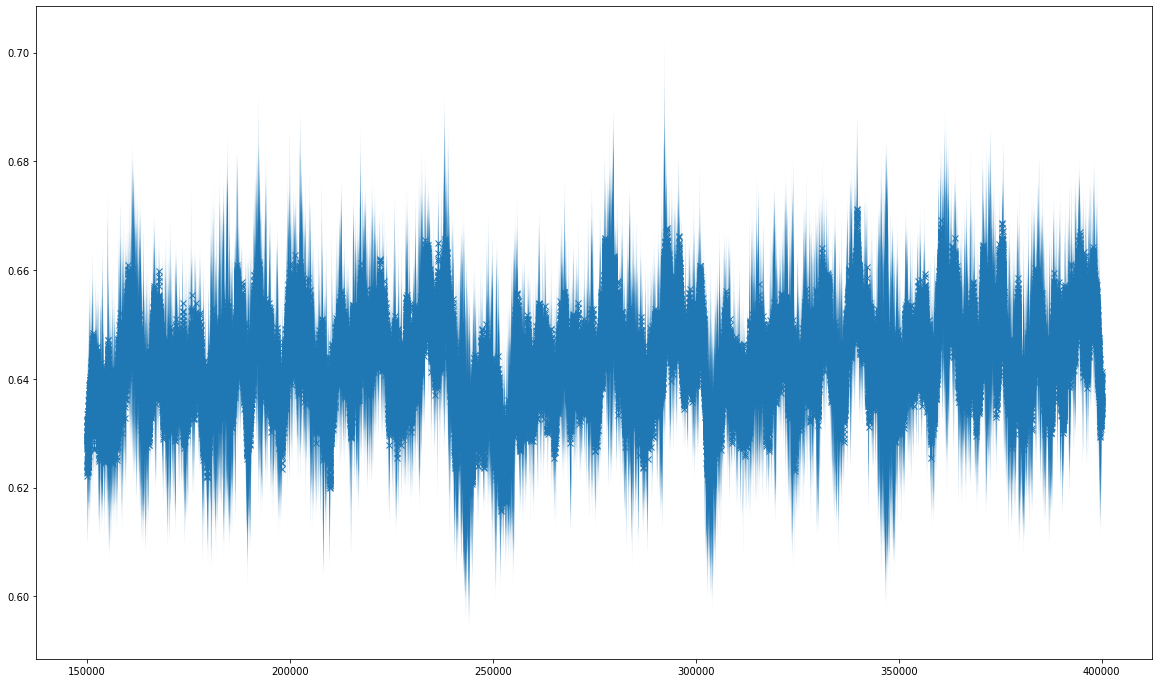

In [138]:
plt.figure(figsize=(20,12))
plt.plot(APL[:,0],bygroup_apl_dppg[1][0],linewidth=0.9,marker="x")
#plt.errorbar(APL[:,0],bygroup_apl_dppg[1][0],yerr=bygroup_apl_dppg[1][1]/2,linewidth=0.1)
plt.fill_between(APL[:,0], bygroup_apl_dppg[1][0]-bygroup_apl_dppg[1][1],  bygroup_apl_dppg[1][0]+bygroup_apl_dppg[1][1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7eff708a94e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff708a61d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eff708a9080>,
 'medians': [<matplotlib.lines.Line2D at 0x7eff708ac978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff708acc88>,
 'means': []}

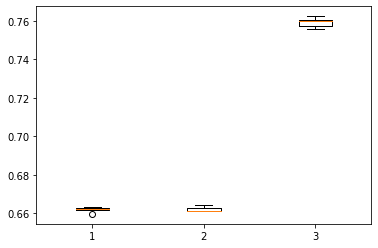

In [98]:
mean_Data2 = mean_Data[1:]
split = [mean_Data2[x:x+5] for x in range(0, len(mean_Data2), 5)]
plt.boxplot(split)

# Order parameter of the membrane in systems with STX

# DMPG

reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   

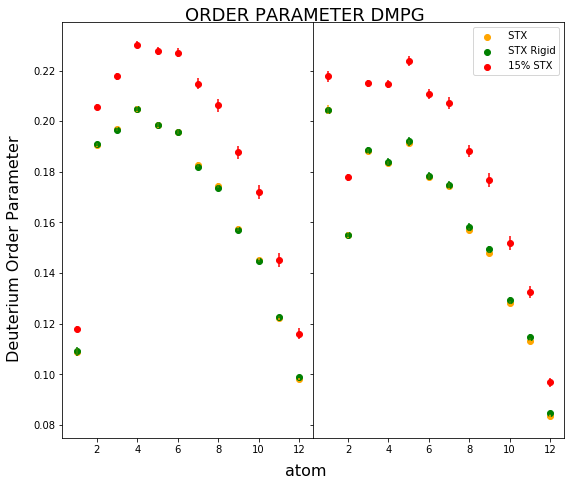

In [94]:
fig,ax  = plt.subplots(1,2 , sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(9,7))
bt_op_ch1_dmpg = []
bt_op_ch2_dmpg = []

for j,direc in enumerate(DMPG_fol[1:]):
    ch1=[]
    ch2=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        #try:
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        ch1.append(order_param_1[:,1])
        ch2.append(order_param_2[:,1])
        if("MEM" in direc):
            bt_op_ch1_dmpg.append(ch1)
            break
        if(replica==5):
            sum_temp=(ch1[0]+ch1[1]+ch1[2]+ch1[3]+ch1[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch1,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch1_dmpg.append((mean,std))
            sum_temp=(ch2[0]+ch2[1]+ch2[2]+ch2[3]+ch2[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch2,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch2_dmpg.append((mean,std))
        #except:
        #    print("no data  {}  ".format(direc),end="")
        
ax[0].scatter(np.arange(1,13),bt_op_ch1_dmpg[0][0],label=" STX",color="orange")
ax[0].errorbar(np.arange(1,13),bt_op_ch1_dmpg[0][0],yerr=bt_op_ch1_dmpg[0][1],ls="none",color="orange")
ax[0].scatter(np.arange(1,13),bt_op_ch1_dmpg[1][0],label=" STX Rigid",color="g")
ax[0].errorbar(np.arange(1,13),bt_op_ch1_dmpg[1][0],yerr=bt_op_ch1_dmpg[1][1],ls="none",color="g")
ax[0].scatter(np.arange(1,13),bt_op_ch1_dmpg[2][0],label=" 15% STX",color="r")
ax[0].errorbar(np.arange(1,13),bt_op_ch1_dmpg[2][0],yerr=bt_op_ch1_dmpg[2][1],ls="none",color="r")

ax[1].scatter(np.arange(1,13),bt_op_ch2_dmpg[0][0],label=" STX",color="orange")
ax[1].errorbar(np.arange(1,13),bt_op_ch2_dmpg[0][0],yerr=bt_op_ch2_dmpg[0][1],ls="none",color="orange")
ax[1].scatter(np.arange(1,13),bt_op_ch2_dmpg[1][0],label=" STX Rigid",color="g")
ax[1].errorbar(np.arange(1,13),bt_op_ch2_dmpg[1][0],yerr=bt_op_ch2_dmpg[1][1],ls="none",color="g")
ax[1].scatter(np.arange(1,13),bt_op_ch2_dmpg[2][0],label=" 15% STX",color="r")
ax[1].errorbar(np.arange(1,13),bt_op_ch2_dmpg[2][0],yerr=bt_op_ch2_dmpg[2][1],ls="none",color="r")

fig.suptitle("ORDER PARAMETER DMPG", fontsize=18)
plt.subplots_adjust(top=0.95)
fig.text(0.5, 0.05, 'atom', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Deuterium Order Parameter', va='center', rotation='vertical',fontsize=16)
ax[1].legend()
fig.savefig("OP_DMPG.jpg")

# DPPG

reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   

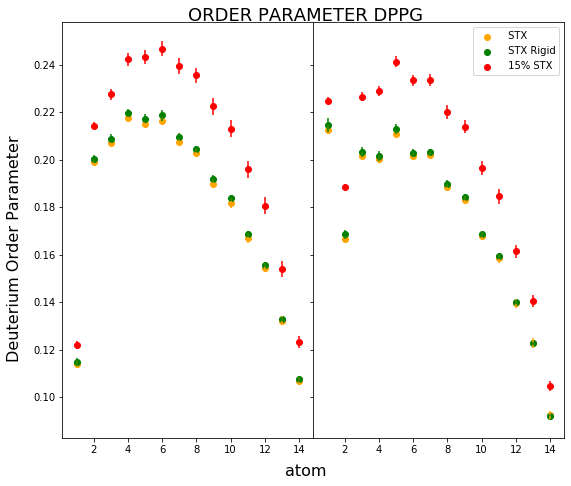

In [92]:
fig,ax  = plt.subplots(1,2 , sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(9,7))
bt_op_ch1_dppg = []
bt_op_ch2_dppg = []

for j,direc in enumerate(DPPG_fol[1:]):
    ch1=[]
    ch2=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        #try:
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        ch1.append(order_param_1[:,1])
        ch2.append(order_param_2[:,1])
        if("MEM" in direc):
            bt_op_ch1_dppg.append(ch1)
            break
        if(replica==5):
            sum_temp=(ch1[0]+ch1[1]+ch1[2]+ch1[3]+ch1[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch1,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch1_dppg.append((mean,std))
            sum_temp=(ch2[0]+ch2[1]+ch2[2]+ch2[3]+ch2[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch2,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch2_dppg.append((mean,std))
        #except:
        #    print("no data  {}  ".format(direc),end="")
ax[0].scatter(np.arange(1,15),bt_op_ch1_dppg[0][0],label=" STX",color="orange")
ax[0].errorbar(np.arange(1,15),bt_op_ch1_dppg[0][0],yerr=bt_op_ch1_dppg[0][1],ls="none",color="orange")


ax[0].scatter(np.arange(1,15),bt_op_ch1_dppg[1][0],label=" STX Rigid",color="g")
ax[0].errorbar(np.arange(1,15),bt_op_ch1_dppg[1][0],yerr=bt_op_ch1_dppg[1][1],ls="none",color="g")


ax[0].scatter(np.arange(1,15),bt_op_ch1_dppg[2][0],label=" 15% STX",color="r")
ax[0].errorbar(np.arange(1,15),bt_op_ch1_dppg[2][0],yerr=bt_op_ch1_dppg[2][1],ls="none",color="r")

ax[1].scatter(np.arange(1,15),bt_op_ch2_dppg[0][0],label=" STX",color="orange")
ax[1].errorbar(np.arange(1,15),bt_op_ch2_dppg[0][0],yerr=bt_op_ch2_dppg[0][1],ls="none",color="orange")


ax[1].scatter(np.arange(1,15),bt_op_ch2_dppg[1][0],label=" STX Rigid",color="g")
ax[1].errorbar(np.arange(1,15),bt_op_ch2_dppg[1][0],yerr=bt_op_ch2_dppg[1][1],ls="none",color="g")


ax[1].scatter(np.arange(1,15),bt_op_ch2_dppg[2][0],label=" 15% STX",color="r")
ax[1].errorbar(np.arange(1,15),bt_op_ch2_dppg[2][0],yerr=bt_op_ch2_dppg[2][1],ls="none",color="r")


ax[1].legend()
fig.suptitle("ORDER PARAMETER DPPG", fontsize=18)
plt.subplots_adjust(top=0.95)
fig.text(0.5, 0.05, 'atom', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Deuterium Order Parameter', va='center', rotation='vertical',fontsize=16)
fig.savefig("OP_DPPG.jpg")

reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   

Text(0.04, 0.5, 'Deuterium Order Parameter')

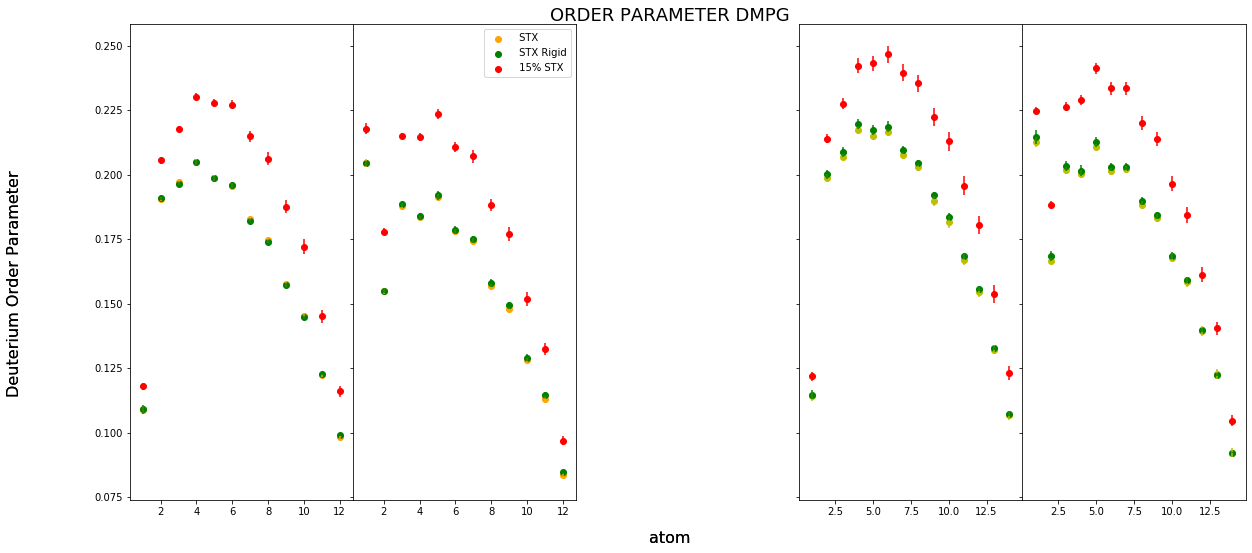

In [91]:
fig,ax  = plt.subplots(1,5 , sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,8))
bt_op_ch1_dmpg = []
bt_op_ch2_dmpg = []

for j,direc in enumerate(DMPG_fol[1:]):
    ch1=[]
    ch2=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        #try:
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        ch1.append(order_param_1[:,1])
        ch2.append(order_param_2[:,1])
        if("MEM" in direc):
            bt_op_ch1_dmpg.append(ch1)
            break
        if(replica==5):
            sum_temp=(ch1[0]+ch1[1]+ch1[2]+ch1[3]+ch1[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch1,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch1_dmpg.append((mean,std))
            sum_temp=(ch2[0]+ch2[1]+ch2[2]+ch2[3]+ch2[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch2,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch2_dmpg.append((mean,std))
        #except:
        #    print("no data  {}  ".format(direc),end="")
        
ax[0].scatter(np.arange(1,13),bt_op_ch1_dmpg[0][0],label=" STX",color="orange")
ax[0].errorbar(np.arange(1,13),bt_op_ch1_dmpg[0][0],yerr=bt_op_ch1_dmpg[0][1],ls="none",color="orange")
ax[0].scatter(np.arange(1,13),bt_op_ch1_dmpg[1][0],label=" STX Rigid",color="g")
ax[0].errorbar(np.arange(1,13),bt_op_ch1_dmpg[1][0],yerr=bt_op_ch1_dmpg[1][1],ls="none",color="g")
ax[0].scatter(np.arange(1,13),bt_op_ch1_dmpg[2][0],label=" 15% STX",color="r")
ax[0].errorbar(np.arange(1,13),bt_op_ch1_dmpg[2][0],yerr=bt_op_ch1_dmpg[2][1],ls="none",color="r")

ax[1].scatter(np.arange(1,13),bt_op_ch2_dmpg[0][0],label=" STX",color="orange")
ax[1].errorbar(np.arange(1,13),bt_op_ch2_dmpg[0][0],yerr=bt_op_ch2_dmpg[0][1],ls="none",color="orange")
ax[1].scatter(np.arange(1,13),bt_op_ch2_dmpg[1][0],label=" STX Rigid",color="g")
ax[1].errorbar(np.arange(1,13),bt_op_ch2_dmpg[1][0],yerr=bt_op_ch2_dmpg[1][1],ls="none",color="g")
ax[1].scatter(np.arange(1,13),bt_op_ch2_dmpg[2][0],label=" 15% STX",color="r")
ax[1].errorbar(np.arange(1,13),bt_op_ch2_dmpg[2][0],yerr=bt_op_ch2_dmpg[2][1],ls="none",color="r")

fig.suptitle("ORDER PARAMETER DMPG", fontsize=18)
plt.subplots_adjust(top=0.95)
fig.text(0.5, 0.05, 'atom', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Deuterium Order Parameter', va='center', rotation='vertical',fontsize=16)
ax[1].legend()


ax[2].remove()

bt_op_ch1_dppg = []
bt_op_ch2_dppg = []

for j,direc in enumerate(DPPG_fol[1:]):
    ch1=[]
    ch2=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        #try:
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}deu_ch1.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        order_param_2 = np.genfromtxt("{}/{}/{}_{}deu_ch2.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        ch1.append(order_param_1[:,1])
        ch2.append(order_param_2[:,1])
        if("MEM" in direc):
            bt_op_ch1_dppg.append(ch1)
            break
        if(replica==5):
            sum_temp=(ch1[0]+ch1[1]+ch1[2]+ch1[3]+ch1[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch1,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch1_dppg.append((mean,std))
            sum_temp=(ch2[0]+ch2[1]+ch2[2]+ch2[3]+ch2[4])
            mean=sum_temp/5
            temp_ar = np.stack(ch2,axis=0)
            std=np.std(temp_ar,axis=0)
            bt_op_ch2_dppg.append((mean,std))
        #except:
        #    print("no data  {}  ".format(direc),end="")
ax[3].scatter(np.arange(1,15),bt_op_ch1_dppg[0][0],label=" STX",color="y")
ax[3].errorbar(np.arange(1,15),bt_op_ch1_dppg[0][0],yerr=bt_op_ch1_dppg[0][1],ls="none",color="y")


ax[3].scatter(np.arange(1,15),bt_op_ch1_dppg[1][0],label=" STX Rigid",color="g")
ax[3].errorbar(np.arange(1,15),bt_op_ch1_dppg[1][0],yerr=bt_op_ch1_dppg[1][1],ls="none",color="g")


ax[3].scatter(np.arange(1,15),bt_op_ch1_dppg[2][0],label=" 15% STX",color="r")
ax[3].errorbar(np.arange(1,15),bt_op_ch1_dppg[2][0],yerr=bt_op_ch1_dppg[2][1],ls="none",color="r")
ax

ax[4].scatter(np.arange(1,15),bt_op_ch2_dppg[0][0],label=" STX",color="y")
ax[4].errorbar(np.arange(1,15),bt_op_ch2_dppg[0][0],yerr=bt_op_ch2_dppg[0][1],ls="none",color="y")


ax[4].scatter(np.arange(1,15),bt_op_ch2_dppg[1][0],label=" STX Rigid",color="g")
ax[4].errorbar(np.arange(1,15),bt_op_ch2_dppg[1][0],yerr=bt_op_ch2_dppg[1][1],ls="none",color="g")


ax[4].scatter(np.arange(1,15),bt_op_ch2_dppg[2][0],label=" 15% STX",color="r")
ax[4].errorbar(np.arange(1,15),bt_op_ch2_dppg[2][0],yerr=bt_op_ch2_dppg[2][1],ls="none",color="r")


ax[1].legend()
#fig.suptitle("ORDER PARAMETER DPPG", fontsize=18)
plt.subplots_adjust(top=0.95)
fig.text(0.5, 0.05, 'atom', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'Deuterium Order Parameter', va='center', rotation='vertical',fontsize=16)


# Order parameter of STX

reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPP

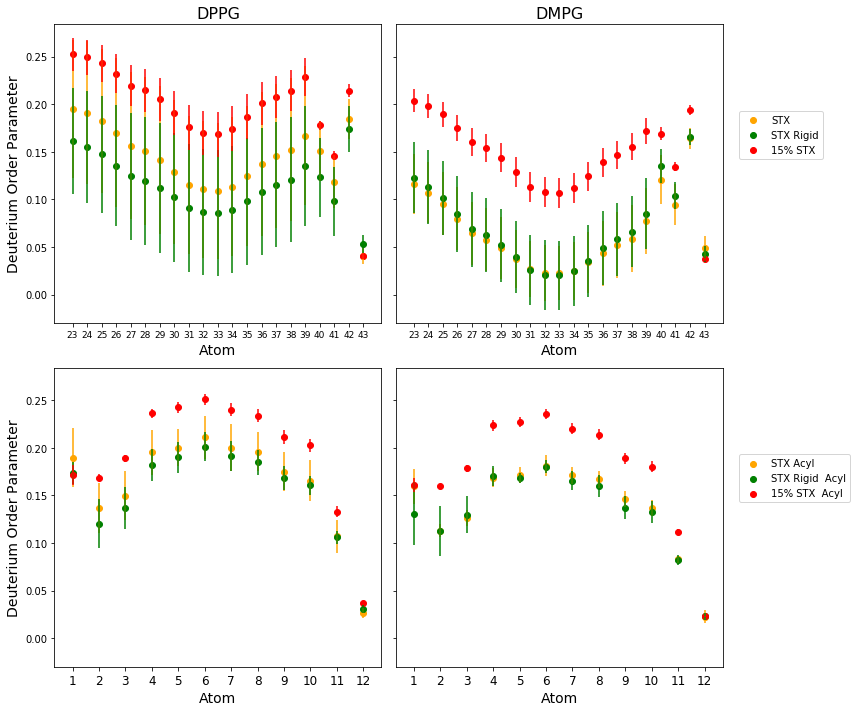

In [110]:
fig,ax  = plt.subplots(2,2,sharex=False,sharey=True,figsize=(12,10))
byg_opstx_dppg = []
for j,direc in enumerate(DPPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ConjCh_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dppg.append((mean,std))

ax[0][0].scatter(np.arange(23,44),byg_opstx_dppg[0][0],color="orange")
ax[0][0].errorbar(np.arange(23,44),byg_opstx_dppg[0][0],yerr=byg_opstx_dppg[0][1],ls="none",color="orange")

ax[0][0].scatter(np.arange(23,44),byg_opstx_dppg[1][0],color="g")
ax[0][0].errorbar(np.arange(23,44),byg_opstx_dppg[1][0],yerr=byg_opstx_dppg[1][1],ls="none",color="g")

ax[0][0].scatter(np.arange(23,44),byg_opstx_dppg[2][0],color="r")
ax[0][0].errorbar(np.arange(23,44),byg_opstx_dppg[2][0],yerr=byg_opstx_dppg[2][1],ls="none",color="r")

ax[0][0].set_xticks(np.arange(23,44))
ax[0][0].set_xticklabels(np.arange(23,44),fontsize=9)
ax[0][0].set_xlabel("Atom",fontsize=14)
ax[0][0].set_ylabel("Deuterium Order Parameter",fontsize=14)
ax[0][0].set_title("DPPG",fontsize=16)




byg_opstx_dmpg = []
for j,direc in enumerate(DMPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ConjCh_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dmpg.append((mean,std))

ax[0][1].scatter(np.arange(23,44),byg_opstx_dmpg[0][0],label="STX",color="orange")
ax[0][1].errorbar(np.arange(23,44),byg_opstx_dmpg[0][0],yerr=byg_opstx_dmpg[0][1],ls="none",color="orange")

ax[0][1].scatter(np.arange(23,44),byg_opstx_dmpg[1][0],label="STX Rigid",color="g")
ax[0][1].errorbar(np.arange(23,44),byg_opstx_dmpg[1][0],yerr=byg_opstx_dmpg[1][1],ls="none",color="g")

ax[0][1].scatter(np.arange(23,44),byg_opstx_dmpg[2][0],label="15% STX ",color="r")
ax[0][1].errorbar(np.arange(23,44),byg_opstx_dmpg[2][0],yerr=byg_opstx_dmpg[2][1],ls="none",color="r")

ax[0][1].set_xticks(np.arange(23,44))
ax[0][1].set_xticklabels(np.arange(23,44),fontsize=9)
ax[0][1].set_xlabel("Atom",fontsize=14)
#ax[0][1].set_ylabel("Deuterium Order Parameter",fontsize=14)
ax[0][1].set_title("DMPG",fontsize=16)
ax[0][1].legend(loc=(1.05,0.55))




### ACYL CHAIN ORDER PARAMETER $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

byg_opstx_dppg = []


for j,direc in enumerate(DPPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ACYL_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dppg.append((mean,std))

ax[1][0].scatter(np.arange(1,13),byg_opstx_dppg[0][0],color="orange")
ax[1][0].errorbar(np.arange(1,13),byg_opstx_dppg[0][0],yerr=byg_opstx_dppg[0][1],ls="none" ,color="orange")

ax[1][0].scatter(np.arange(1,13),byg_opstx_dppg[1][0],color="g")
ax[1][0].errorbar(np.arange(1,13),byg_opstx_dppg[1][0],yerr=byg_opstx_dppg[1][1],ls="none",color="g")

ax[1][0].scatter(np.arange(1,13),byg_opstx_dppg[2][0],color="r")
ax[1][0].errorbar(np.arange(1,13),byg_opstx_dppg[2][0],yerr=byg_opstx_dppg[2][1],ls="none",color="r")

ax[1][0].set_xticks(np.arange(1,13))
ax[1][0].set_xticklabels(np.arange(1,13),fontsize=12)
ax[1][0].set_xlabel("Atom",fontsize=14)
ax[1][0].set_ylabel("Deuterium Order Parameter",fontsize=14)


byg_opstx_dmpg = []
for j,direc in enumerate(DMPG_fol[1:]):
    op_stx=[]
    for replica in range(1,6):
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        order_param_1 = np.genfromtxt("{}/{}/{}_{}STX_ACYL_OP.xvg".format(bas_dir[0],work_dir,direc[:-1],replica),skip_header=17)
        op_stx.append(order_param_1[:,1])
        if(replica==5):
            sum_temp=(op_stx[0]+op_stx[1]+op_stx[2]+op_stx[3]+op_stx[4])
            mean=sum_temp/5
            temp_ar = np.stack(op_stx,axis=0)
            std=np.std(temp_ar,axis=0)
            byg_opstx_dmpg.append((mean,std))

ax[1][1].scatter(np.arange(1,13),byg_opstx_dmpg[0][0],label="STX Acyl",color="orange")
ax[1][1].errorbar(np.arange(1,13),byg_opstx_dmpg[0][0],yerr=byg_opstx_dmpg[0][1],ls="none",color="orange")

ax[1][1].scatter(np.arange(1,13),byg_opstx_dmpg[1][0],label="STX Rigid  Acyl",color="g")
ax[1][1].errorbar(np.arange(1,13),byg_opstx_dmpg[1][0],yerr=byg_opstx_dmpg[1][1],ls="none",color="g")

ax[1][1].scatter(np.arange(1,13),byg_opstx_dmpg[2][0],label="15% STX  Acyl ",color="r")
ax[1][1].errorbar(np.arange(1,13),byg_opstx_dmpg[2][0],yerr=byg_opstx_dmpg[2][1],ls="none",color="r")

ax[1][1].set_xticks(np.arange(1,13))
ax[1][1].set_xticklabels(np.arange(1,13),fontsize=12)
ax[1][1].set_xlabel("Atom",fontsize=14)
#ax[1][1].set_ylabel("Deuterium Order Parameter",fontsize=14)

ax[1][1].legend(loc=(1.05,0.55))

fig.subplots_adjust(wspace=0.1,hspace=0.1)
plt.tight_layout()
plt.savefig("STX_OP.jpg", bbox_inches='tight')



# Thickness


reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   

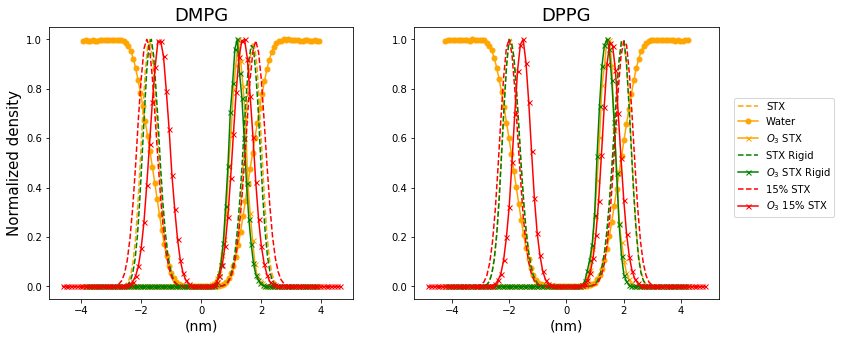

In [177]:
fig,(f_ax1,f_ax2) = plt.subplots(1,2,figsize=(12,5))
bygroup_sugar_dmpg = []
bg_p_dmpg = []
dist_dmpg=[]
wat_dmpg=[]
lip_mem=[]

for j,direc in enumerate(DMPG_fol[1:]):
    sug_den=[]
    p_den=[]
    dist=[]
    lip_1stx=[]
    lip_15o3=[]
    wat=[]
    for replica in range(1,6):
        #try:
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
        density_phos = np.genfromtxt("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        wate_dat=np.genfromtxt("{}/{}/{}_{}water_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        sug_den.append(sugar_den[:,1])
        p_den.append(density_phos[:,1])
        dist.append(density_phos[:,0])
        wat.append(wate_dat[:,1])
        #print(dist)
        #print(len(dist[0]))
        p_1 =(density_phos[:int(len(density_phos[:,0])/2),0][np.argmax(density_phos[:int(len(density_phos[:,0])/2),1])])
        p_2= (density_phos[int(len(density_phos[:,0])/2):,0][np.argmax(density_phos[int(len(density_phos[:,0])/2):,1])])
        thic = p_2-p_1
        lip_mem.append(thic)
        if("MEM" in direc):
            bygroup_sugar_dmpg.append(ch1)
            wat_dppg.append(wat)
            break
        if(replica==5):
            #print(len(dist[0]))
            sum_temp=(sug_den[0]+sug_den[1]+sug_den[2]+sug_den[3]+sug_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(sug_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_sugar_dmpg.append((mean,std))
            sum_temp=(p_den[0]+p_den[1]+p_den[2]+p_den[3]+p_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(p_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bg_p_dmpg.append((mean,std))
            
            
            sum_temp2=(dist[0]+dist[1]+dist[2])
            mean2=sum_temp2/3
            dist_dmpg.append(mean2)
            
            
            sum_temp3=(wat[0]+wat[1]+wat[2]+wat[3]+wat[4])
            mean=sum_temp3/5
            temp_ar = np.stack(wat,axis=0)
            std=np.std(temp_ar,axis=0)
            wat_dmpg.append((mean,std))
        #except:
        #    print("no data")
        


f_ax1.set_title('DMPG',fontsize=18)
f_ax1.plot(dist_dmpg[0],bg_p_dmpg[0][0]/max(bg_p_dmpg[0][0]),color="orange",label="STX",linestyle="--")
f_ax1.plot(dist_dmpg[0],wat_dmpg[0][0]/max(wat_dmpg[0][0]),color="orange",marker="o",label="Water",markersize=5)
f_ax1.plot(dist_dmpg[0],bygroup_sugar_dmpg[0][0]/max(bygroup_sugar_dmpg[0][0]),label="$O_3$ STX",color="orange",marker="x",markersize=5)



f_ax1.plot(dist_dmpg[1],bg_p_dmpg[1][0]/max(bg_p_dmpg[1][0]),color="g",label="STX Rigid",linestyle="--")
#f_ax1.plot(dist_dmpg[0],wat_dmpg[1][0]/max(wat_dmpg[1][0]),color="g",marker="o",label="water")
f_ax1.plot(dist_dmpg[1],bygroup_sugar_dmpg[1][0]/max(bygroup_sugar_dmpg[1][0]),label="$O_3$ STX Rigid",color="g",marker="x",markersize=5)


f_ax1.plot(dist_dmpg[2],bg_p_dmpg[2][0]/max(bg_p_dmpg[2][0]),color="r",label="15% STX",linestyle="--")
#f_ax1.plot(dist_dmpg[0],wat_dmpg[2][0]/max(wat_dmpg[2][0]),color="r",marker="o",label="water",markersize=2)
f_ax1.plot(dist_dmpg[2],bygroup_sugar_dmpg[2][0]/max(bygroup_sugar_dmpg[2][0]),label="$O_3$ 15% STX",color="r",marker="x",markersize=5)
f_ax1.set_xlabel( "(nm)",fontsize=14 )
f_ax1.set_ylabel("Normalized density",fontsize=15)
bygroup_sugar_dppg = []
bg_p_dppg = []
dist_dppg=[]
wat_dppg=[]
for j,direc in enumerate(DPPG_fol[1:]):
    sug_den=[]
    p_den=[]
    dist=[]
    lip_1stx=[]
    lip_15o3=[]
    wat=[]
    for replica in range(1,6):
        #try:
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
        density_phos = np.genfromtxt("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        wate_dat=np.genfromtxt("{}/{}/{}_{}water_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        #print(wate_dat[:,1])
        sug_den.append(sugar_den[:,1])
        p_den.append(density_phos[:,1])
        dist.append(density_phos[:,0])
        wat.append(wate_dat[:,1])
        p_1 =(density_phos[:int(len(density_phos[:,0])/2),0][np.argmax(density_phos[:int(len(density_phos[:,0])/2),1])])
        p_2= (density_phos[int(len(density_phos[:,0])/2):,0][np.argmax(density_phos[int(len(density_phos[:,0])/2):,1])])
        thic = p_2-p_1
        lip_mem.append(thic)
        #print(dist)
        #print(len(dist[0]))
        if("MEM" in direc):
            bygroup_sugar_dppg.append(ch1)
            wat_dppg.append(wat)
            break
        if(replica==5):
            #print(len(dist[0]))
            sum_temp=(sug_den[0]+sug_den[1]+sug_den[2]+sug_den[3]+sug_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(sug_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_sugar_dppg.append((mean,std))
            sum_temp=(p_den[0]+p_den[1]+p_den[2]+p_den[3]+p_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(p_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bg_p_dppg.append((mean,std))
            sum_temp2=(dist[0]+dist[1]+dist[2]+dist[3]+dist[4])
            mean2=sum_temp2/5
            dist_dppg.append(mean2)
            #print(wat)
            sum_temp3=(wat[0]+wat[1]+wat[2]+wat[3]+wat[4])
            mean=sum_temp3/5
            temp_ar = np.stack(wat,axis=0)
            std=np.std(temp_ar,axis=0)
            wat_dppg.append((mean,std))
            
        #except:
        #    print("no data")

f_ax2.set_title('DPPG',fontsize=18)
f_ax2.plot(dist_dppg[0],bg_p_dppg[0][0]/max(bg_p_dppg[0][0]),color="orange",label="P-P",linestyle="--")
f_ax2.plot(dist_dppg[0],wat_dppg[0][0]/max(wat_dppg[0][0]),color="orange",marker="o",label="Water",markersize=5)
f_ax2.plot(dist_dppg[0],bygroup_sugar_dppg[0][0]/max(bygroup_sugar_dppg[0][0]),label="$O_3$ STX",color="orange",marker="x",markersize=5)



f_ax2.plot(dist_dppg[1],bg_p_dppg[1][0]/max(bg_p_dppg[1][0]),color="g",linestyle="--")
#f_ax2.plot(dist_dppg[0],wat_dppg[1][0]/max(wat_dppg[1][0]),color="g",marker="o",label="water")
f_ax2.plot(dist_dppg[1],bygroup_sugar_dppg[1][0]/max(bygroup_sugar_dppg[1][0]),label="$O_3$ STX",color="g",marker="x",markersize=5)


f_ax2.plot(dist_dppg[2],bg_p_dppg[2][0]/max(bg_p_dppg[2][0]),color="r",linestyle="--")
#f_ax2.plot(dist_dppg[0],wat_dppg[2][0]/max(wat_dppg[2][0]),color="r",marker="o",label="water",markersize=2)
f_ax2.plot(dist_dppg[2],bygroup_sugar_dppg[2][0]/max(bygroup_sugar_dppg[2][0]),label="$O_3$ STX",color="r",marker="x",markersize=5)
f_ax2.set_xlabel( "(nm)",fontsize=14 )
#f_ax2.set_ylabel("Normalized density",fontsize=15)
#f_ax2.plot(dist_dppg[0],bg_p_dppg[1][0]/max(bg_p_dppg[1][0]),marker=".",color="g")
#f_ax2.plot(dist_dppg[0],wat_dppg[1][0]/max(wat_dppg[1][0]),color="g")
#f_ax2.plot(dist_dppg[0],bygroup_sugar_dppg[1][0],label="sugar STX Rigid",color="g")
#f_ax2.errorbar(dist_dppg[0],bg_p_dppg[0][0],yerr=bg_p_dppg[0][1],ls="none")



#f_ax2.plot(dist_dppg[0],bg_p_dppg[1][0]/max(bg_p_dppg[1][0]),marker=".",color="g")
#f_ax2.errorbar(dist_dppg[0],bg_p_dppg[1][0],yerr=bg_p_dppg[1][1],ls="none")
#f_ax2.plot(dist_dppg[0],bg_p_dppg[2][0]/max(bg_p_dppg[2][0]),marker=".",color="r")
#f_ax2.errorbar(dist_dppg[0],bg_p_dppg[2][0],yerr=bg_p_dppg[2][1],ls="none")
f_ax1.legend(loc=(2.25,0.3))
fig.savefig("Thic_wa.jpg", bbox_inches='tight')




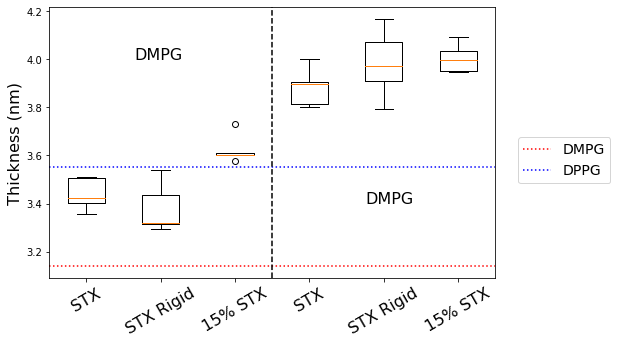

In [179]:
plt.figure(figsize=(8,5))
composite_list = [lip_mem[x:x+5] for x in range(0, len(lip_mem),5)]
names = DMPG_fol[1:] + DPPG_fol[1:]
plt.boxplot(composite_list)
plt.axhline(3.14,linestyle=":",label="DMPG",c="r")
plt.axhline(3.55,linestyle=":",label="DPPG",c="b")
plt.xticks(np.arange(1,7),["STX","STX Rigid","15% STX","STX","STX Rigid","15% STX"],fontsize=16,rotation=30)
plt.ylabel(" Thickness (nm) ",fontsize=16)
plt.axvline(3.5,linestyle="--",c="black")
plt.legend(fontsize=14,loc=(1.05,0.35))
plt.text(1.65,4,"DMPG",fontsize=16)
plt.text(4.75,3.4,"DMPG",fontsize=16)
plt.savefig("BoxPLot_Thickness_alone.jpg", bbox_inches='tight')

In [117]:
composite_list[:3]

[[3.3571, 3.50752, 3.40114, 3.4249, 3.51178],
 [3.29278, 3.3162700000000003, 3.53826, 3.3207, 3.43536],
 [3.60108, 3.5751, 3.73204, 3.60296, 3.6114]]

reading from STX-DMPG/1   reading from STX-DMPG/2   reading from STX-DMPG/3   reading from STX-DMPG/4   reading from STX-DMPG/5   reading from STXQM-DMPG/1   reading from STXQM-DMPG/2   reading from STXQM-DMPG/3   reading from STXQM-DMPG/4   reading from STXQM-DMPG/5   reading from 15STX-DMPG/1   reading from 15STX-DMPG/2   reading from 15STX-DMPG/3   reading from 15STX-DMPG/4   reading from 15STX-DMPG/5   reading from STX-DPPG/1   reading from STX-DPPG/2   reading from STX-DPPG/3   reading from STX-DPPG/4   reading from STX-DPPG/5   reading from STXQM-DPPG/1   reading from STXQM-DPPG/2   reading from STXQM-DPPG/3   reading from STXQM-DPPG/4   reading from STXQM-DPPG/5   reading from 15STX-DPPG/1   reading from 15STX-DPPG/2   reading from 15STX-DPPG/3   reading from 15STX-DPPG/4   reading from 15STX-DPPG/5   

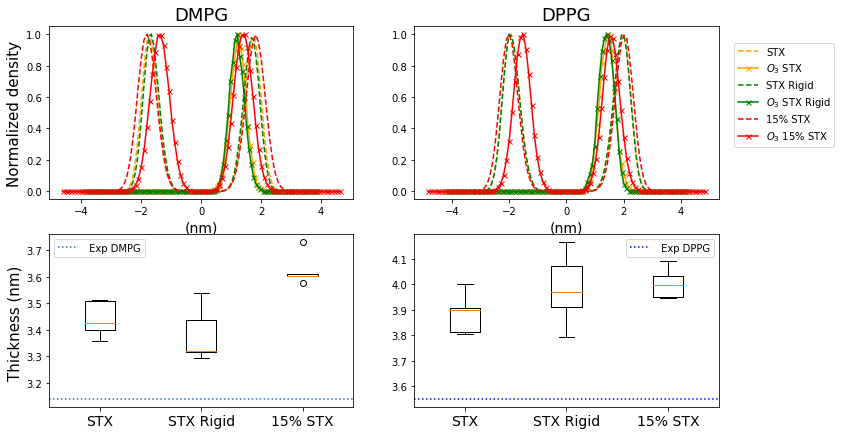

In [173]:
fig,ax = plt.subplots(2,2,figsize=(12,7))
bygroup_sugar_dmpg = []
bg_p_dmpg = []
dist_dmpg=[]
wat_dmpg=[]
lip_mem=[]

for j,direc in enumerate(DMPG_fol[1:]):
    sug_den=[]
    p_den=[]
    dist=[]
    lip_1stx=[]
    lip_15o3=[]
    wat=[]
    for replica in range(1,6):
        #try:
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
        density_phos = np.genfromtxt("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        wate_dat=np.genfromtxt("{}/{}/{}_{}water_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        sug_den.append(sugar_den[:,1])
        p_den.append(density_phos[:,1])
        dist.append(density_phos[:,0])
        wat.append(wate_dat[:,1])
        #print(dist)
        #print(len(dist[0]))
        p_1 =(density_phos[:int(len(density_phos[:,0])/2),0][np.argmax(density_phos[:int(len(density_phos[:,0])/2),1])])
        p_2= (density_phos[int(len(density_phos[:,0])/2):,0][np.argmax(density_phos[int(len(density_phos[:,0])/2):,1])])
        thic = p_2-p_1
        lip_mem.append(thic)
        if("MEM" in direc):
            bygroup_sugar_dmpg.append(ch1)
            wat_dppg.append(wat)
            break
        if(replica==5):
            #print(len(dist[0]))
            sum_temp=(sug_den[0]+sug_den[1]+sug_den[2]+sug_den[3]+sug_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(sug_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_sugar_dmpg.append((mean,std))
            sum_temp=(p_den[0]+p_den[1]+p_den[2]+p_den[3]+p_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(p_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bg_p_dmpg.append((mean,std))
            
            
            sum_temp2=(dist[0]+dist[1]+dist[2])
            mean2=sum_temp2/3
            dist_dmpg.append(mean2)
            
            
            sum_temp3=(wat[0]+wat[1]+wat[2]+wat[3]+wat[4])
            mean=sum_temp3/5
            temp_ar = np.stack(wat,axis=0)
            std=np.std(temp_ar,axis=0)
            wat_dmpg.append((mean,std))
        #except:
        #    print("no data")
        


ax[0][0].set_title('DMPG',fontsize=18)
ax[0][0].plot(dist_dmpg[0],bg_p_dmpg[0][0]/max(bg_p_dmpg[0][0]),color="orange",label="STX",linestyle="--")
#ax[0][0].plot(dist_dmpg[0],wat_dmpg[0][0]/max(wat_dmpg[0][0]),color="orange",marker="o",label="Water",markersize=5)
ax[0][0].plot(dist_dmpg[0],bygroup_sugar_dmpg[0][0]/max(bygroup_sugar_dmpg[0][0]),label="$O_3$ STX",color="orange",marker="x",markersize=5)



ax[0][0].plot(dist_dmpg[1],bg_p_dmpg[1][0]/max(bg_p_dmpg[1][0]),color="g",label="STX Rigid",linestyle="--")
#ax[0][0].plot(dist_dmpg[0],wat_dmpg[1][0]/max(wat_dmpg[1][0]),color="g",marker="o",label="water")
ax[0][0].plot(dist_dmpg[1],bygroup_sugar_dmpg[1][0]/max(bygroup_sugar_dmpg[1][0]),label="$O_3$ STX Rigid",color="g",marker="x",markersize=5)


ax[0][0].plot(dist_dmpg[2],bg_p_dmpg[2][0]/max(bg_p_dmpg[2][0]),color="r",label="15% STX",linestyle="--")
#ax[0][0].plot(dist_dmpg[0],wat_dmpg[2][0]/max(wat_dmpg[2][0]),color="r",marker="o",label="water",markersize=2)
ax[0][0].plot(dist_dmpg[2],bygroup_sugar_dmpg[2][0]/max(bygroup_sugar_dmpg[2][0]),label="$O_3$ 15% STX",color="r",marker="x",markersize=5)
ax[0][0].set_xlabel( "(nm)",fontsize=14 )
ax[0][0].set_ylabel("Normalized density",fontsize=15)
bygroup_sugar_dppg = []
bg_p_dppg = []
dist_dppg=[]
wat_dppg=[]
for j,direc in enumerate(DPPG_fol[1:]):
    sug_den=[]
    p_den=[]
    dist=[]
    lip_1stx=[]
    lip_15o3=[]
    wat=[]
    for replica in range(1,6):
        #try:
        work_dir = ("{}{}".format(direc,replica))
        print("reading from {}   ".format(work_dir),end="")
        sugar_den = np.genfromtxt(("{}/{}/{}_{}sugar_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica)))
        density_phos = np.genfromtxt("{}/{}/{}_{}p_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        wate_dat=np.genfromtxt("{}/{}/{}_{}water_density.xvg".format(bas_dir[0],work_dir,direc[:-1],replica))
        #print(wate_dat[:,1])
        sug_den.append(sugar_den[:,1])
        p_den.append(density_phos[:,1])
        dist.append(density_phos[:,0])
        wat.append(wate_dat[:,1])
        p_1 =(density_phos[:int(len(density_phos[:,0])/2),0][np.argmax(density_phos[:int(len(density_phos[:,0])/2),1])])
        p_2= (density_phos[int(len(density_phos[:,0])/2):,0][np.argmax(density_phos[int(len(density_phos[:,0])/2):,1])])
        thic = p_2-p_1
        lip_mem.append(thic)
        #print(dist)
        #print(len(dist[0]))
        if("MEM" in direc):
            bygroup_sugar_dppg.append(ch1)
            wat_dppg.append(wat)
            break
        if(replica==5):
            #print(len(dist[0]))
            sum_temp=(sug_den[0]+sug_den[1]+sug_den[2]+sug_den[3]+sug_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(sug_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bygroup_sugar_dppg.append((mean,std))
            sum_temp=(p_den[0]+p_den[1]+p_den[2]+p_den[3]+p_den[4])
            mean=sum_temp/5
            temp_ar = np.stack(p_den,axis=0)
            std=np.std(temp_ar,axis=0)
            bg_p_dppg.append((mean,std))
            sum_temp2=(dist[0]+dist[1]+dist[2]+dist[3]+dist[4])
            mean2=sum_temp2/5
            dist_dppg.append(mean2)
            #print(wat)
            sum_temp3=(wat[0]+wat[1]+wat[2]+wat[3]+wat[4])
            mean=sum_temp3/5
            temp_ar = np.stack(wat,axis=0)
            std=np.std(temp_ar,axis=0)
            wat_dppg.append((mean,std))
            
        #except:
        #    print("no data")

ax[0][1].set_title('DPPG',fontsize=18)
ax[0][1].plot(dist_dppg[0],bg_p_dppg[0][0]/max(bg_p_dppg[0][0]),color="orange",label="P-P",linestyle="--")
#ax[0][1].plot(dist_dppg[0],wat_dppg[0][0]/max(wat_dppg[0][0]),color="orange",marker="o",label="Water",markersize=5)
ax[0][1].plot(dist_dppg[0],bygroup_sugar_dppg[0][0]/max(bygroup_sugar_dppg[0][0]),label="$O_3$ STX",color="orange",marker="x",markersize=5)



ax[0][1].plot(dist_dppg[1],bg_p_dppg[1][0]/max(bg_p_dppg[1][0]),color="g",linestyle="--")
#ax[0][1].plot(dist_dppg[0],wat_dppg[1][0]/max(wat_dppg[1][0]),color="g",marker="o",label="water")
ax[0][1].plot(dist_dppg[1],bygroup_sugar_dppg[1][0]/max(bygroup_sugar_dppg[1][0]),label="$O_3$ STX",color="g",marker="x",markersize=5)


ax[0][1].plot(dist_dppg[2],bg_p_dppg[2][0]/max(bg_p_dppg[2][0]),color="r",linestyle="--")
#ax[0][1].plot(dist_dppg[0],wat_dppg[2][0]/max(wat_dppg[2][0]),color="r",marker="o",label="water",markersize=2)
ax[0][1].plot(dist_dppg[2],bygroup_sugar_dppg[2][0]/max(bygroup_sugar_dppg[2][0]),label="$O_3$ STX",color="r",marker="x",markersize=5)
ax[0][1].set_xlabel( "(nm)",fontsize=14 )
#ax[0][1].set_ylabel("Normalized density",fontsize=15)
#ax[0][1].plot(dist_dppg[0],bg_p_dppg[1][0]/max(bg_p_dppg[1][0]),marker=".",color="g")
#ax[0][1].plot(dist_dppg[0],wat_dppg[1][0]/max(wat_dppg[1][0]),color="g")
#ax[0][1].plot(dist_dppg[0],bygroup_sugar_dppg[1][0],label="sugar STX Rigid",color="g")
#ax[0][1].errorbar(dist_dppg[0],bg_p_dppg[0][0],yerr=bg_p_dppg[0][1],ls="none")



#ax[0][1].plot(dist_dppg[0],bg_p_dppg[1][0]/max(bg_p_dppg[1][0]),marker=".",color="g")
#ax[0][1].errorbar(dist_dppg[0],bg_p_dppg[1][0],yerr=bg_p_dppg[1][1],ls="none")
#ax[0][1].plot(dist_dppg[0],bg_p_dppg[2][0]/max(bg_p_dppg[2][0]),marker=".",color="r")
#ax[0][1].errorbar(dist_dppg[0],bg_p_dppg[2][0],yerr=bg_p_dppg[2][1],ls="none")
ax[0][0].legend(loc=(2.25,0.3))


composite_list = [lip_mem[x:x+5] for x in range(0, len(lip_mem),5)]

ax[1][0].boxplot(composite_list[:3])
#ax[1][0].set_xticklabels([x[:-1] for x in DMPG_fol[1:]])
ax[1][0].set_xticklabels(["STX","STX Rigid","15% STX"],fontsize=14)

ax[1][1].boxplot(composite_list[3:])
#ax[1][0].set_xticklabels([x[:-1] for x in DMPG_fol[1:]])
ax[1][1].set_xticklabels(["STX","STX Rigid","15% STX"],fontsize=14)
#fig.tight_layout()
ax[1][0].set_ylabel("Thickness (nm) ",fontsize=15)
ax[1][0].axhline(3.14,linestyle=":",label=" Exp DMPG")
ax[1][1].axhline(3.55,linestyle=":",label=" Exp DPPG",c="b")
ax[1][1].legend()
ax[1][0].legend()
fig.savefig("Thic_nowa_boxplot.jpg", bbox_inches='tight')

